<a href="https://colab.research.google.com/github/chain13567/-Project-Collection1/blob/main/R_UCI_Abalone%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

產生Colab R 程式環境: https://colab.research.google.com/notebook#create=true&language=r

UCI:https://archive.ics.uci.edu/ml/datasets/abalone?fbclid=IwAR33KojDVo0oSVjuqY8NI392vL_trebhJvP03Zi2gffB0sBMy7eZo_dESmw

# Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

從物理測量中預測鮑魚的年齡。鮑魚的年齡是通過將殼切開錐體、染色並通過顯微鏡計算環的數量來確定的——這是一項無聊且耗時的任務。其他更容易獲得的測量值用於預測年齡。解決問題可能需要更多信息，例如天氣模式和位置​​（因此有食物供應）。

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

從原始數據中刪除了具有缺失值的示例（大多數缺少預測值），並且已縮放連續值的範圍以與 ANN 一起使用（除以 200）

# Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

* Name / Data Type / Measurement Unit / Description

1. Sex(性別) / nominal:名義上的 / -- / M, F, and I (infant):嬰兒
2. Length(長度) / continuous / mm / Longest shell measurement:最長外殼測量
3. Diameter(直徑) / continuous / mm / perpendicular to length:垂直於長度
4. Height(高度) / continuous / mm / with meat in shell:帶殼的肉
5. Whole weight(全重) / continuous / grams:克 / whole abalone:整隻鮑魚
6. Shucked weight(去殼重量) / continuous / grams / weight of meat:肉的重量
7. Viscera weight(內臟重量) / continuous / grams / gut weight (after bleeding):腸道重量（出血後）
8. Shell weight(外殼重量) / continuous / grams / after being dried:曬乾後
9. Rings: / integer / -- / +1.5 gives the age in years:+1.5 給出年齡,
代表鮑魚的年輪，和樹木一樣，一年鮑魚生長一出一個年輪
* The readme file contains attribute statistics.:自述文件包含屬性統計信息。

# 載入模組

In [ ]:
install.packages("plyr")
install.packages("corrplot")
install.packages("gridExtra")
install.packages("ggthemes")
install.packages("caret")
install.packages("MASS")
install.packages("randomForest")
install.packages("party")

library(dplyr)
library(plyr)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(ggthemes)
library(caret)
library(MASS)
library(randomForest)
library(party)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’




#讀取資料

In [ ]:
abalone <- read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header = FALSE, sep = ",") # 檔案路徑是相對於目前的工作目錄，header 是指資料是否有包含欄位名稱，sep 是指資料的分隔符號。

In [ ]:
colnames(abalone) <- c("Sex", "Length","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings") 

In [ ]:
abalone

Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9


In [ ]:
str(abalone)

'data.frame':	4177 obs. of  9 variables:
 $ Sex          : chr  "M" "M" "F" "M" ...
 $ Length       : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter     : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height       : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ WholeWeight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ ShuckedWeight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ VisceraWeight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ ShellWeight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ Rings        : int  15 7 9 10 7 8 20 16 9 19 ...


#處理異常資料
Whole_weight(整體重量) < Shucked_weight(去殼重量) + Viscera_weight(內臟重量) + Shell_weight(殼重) + 剝殼過程中損失的未知水/血質量 
如果資料中出現這個結果,有可能是資料出現錯誤.

In [ ]:
sum(abalone$WholeWeight < abalone$ShellWeight + abalone$VisceraWeight +abalone$ShuckedWeight) 

[1] 155

In [ ]:
newabalone <- (abalone[-(which(abalone$WholeWeight < abalone$ShellWeight + abalone$VisceraWeight +abalone$ShuckedWeight) ),])

In [ ]:
sum(newabalone$WholeWeight < newabalone$ShellWeight + newabalone$VisceraWeight +newabalone$ShuckedWeight) 

[1] 0

In [ ]:
summary(newabalone)

     Sex                Length          Diameter          Height      
 Length:4022        Min.   :0.1100   Min.   :0.0900   Min.   :0.0000  
 Class :character   1st Qu.:0.4550   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.5450   Median :0.4250   Median :0.1450  
                    Mean   :0.5273   Mean   :0.4105   Mean   :0.1405  
                    3rd Qu.:0.6150   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.8150   Max.   :0.6500   Max.   :1.1300  
  WholeWeight     ShuckedWeight    VisceraWeight     ShellWeight    
 Min.   :0.0080   Min.   :0.0025   Min.   :0.0005   Min.   :0.0030  
 1st Qu.:0.4546   1st Qu.:0.1905   1st Qu.:0.0960   1st Qu.:0.1345  
 Median :0.8117   Median :0.3412   Median :0.1725   Median :0.2360  
 Mean   :0.8409   Mean   :0.3633   Mean   :0.1825   Mean   :0.2415  
 3rd Qu.:1.1625   3rd Qu.:0.5065   3rd Qu.:0.2554   3rd Qu.:0.3300  
 Max.   :2.8255   Max.   :1.4880   Max.   :0.7600   Max.   :1.0050  
     Rings   
 Min. 

In [ ]:
dfabalone <- filter(newabalone,newabalone$Height != 0)
summary(dfabalone)

     Sex                Length          Diameter          Height      
 Length:4021        Min.   :0.1100   Min.   :0.0900   Min.   :0.0150  
 Class :character   1st Qu.:0.4550   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.5450   Median :0.4250   Median :0.1450  
                    Mean   :0.5273   Mean   :0.4105   Mean   :0.1405  
                    3rd Qu.:0.6150   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.8150   Max.   :0.6500   Max.   :1.1300  
  WholeWeight    ShuckedWeight    VisceraWeight     ShellWeight    
 Min.   :0.008   Min.   :0.0025   Min.   :0.0005   Min.   :0.0030  
 1st Qu.:0.455   1st Qu.:0.1905   1st Qu.:0.0960   1st Qu.:0.1345  
 Median :0.812   Median :0.3415   Median :0.1725   Median :0.2360  
 Mean   :0.841   Mean   :0.3633   Mean   :0.1825   Mean   :0.2416  
 3rd Qu.:1.163   3rd Qu.:0.5065   3rd Qu.:0.2555   3rd Qu.:0.3300  
 Max.   :2.825   Max.   :1.4880   Max.   :0.7600   Max.   :1.0050  
     Rings   
 Min.   : 2  

#Kmeans 分群

In [ ]:
optimal_clusters <- dfabalone

In [ ]:
optimal_clusters$Sex <- as.factor(mapvalues(optimal_clusters$Sex,from=c("M","F","I"),to=c(1,2,3)))

In [ ]:
head(optimal_clusters)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,3,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
optimal_clusters$Sex <- sapply(optimal_clusters$Sex,as.numeric)

In [ ]:
class(optimal_clusters$Sex)

[1] "numeric"

## 找出最佳分群

In [ ]:
install.packages("factoextra")
library("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



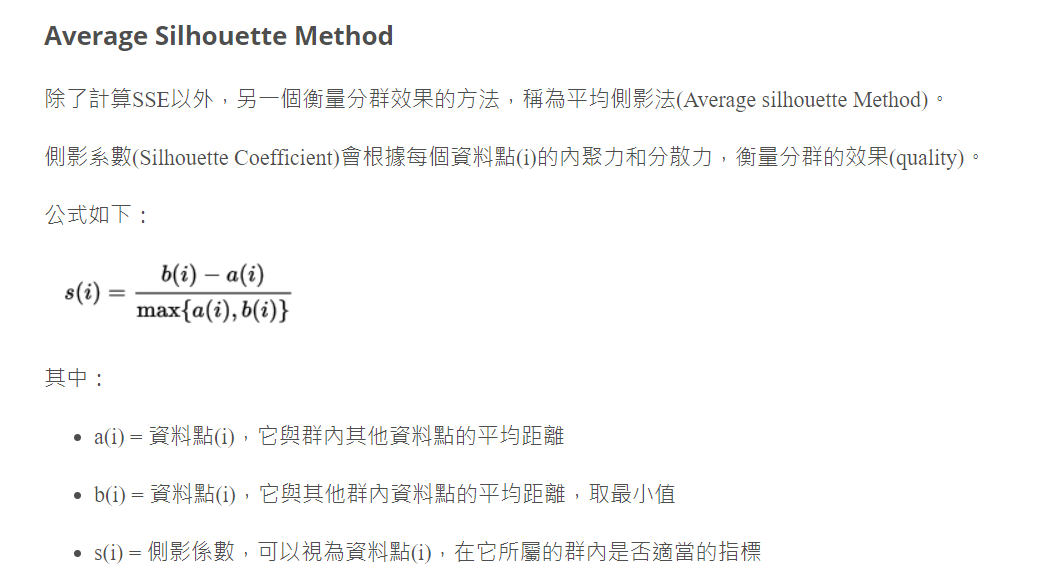

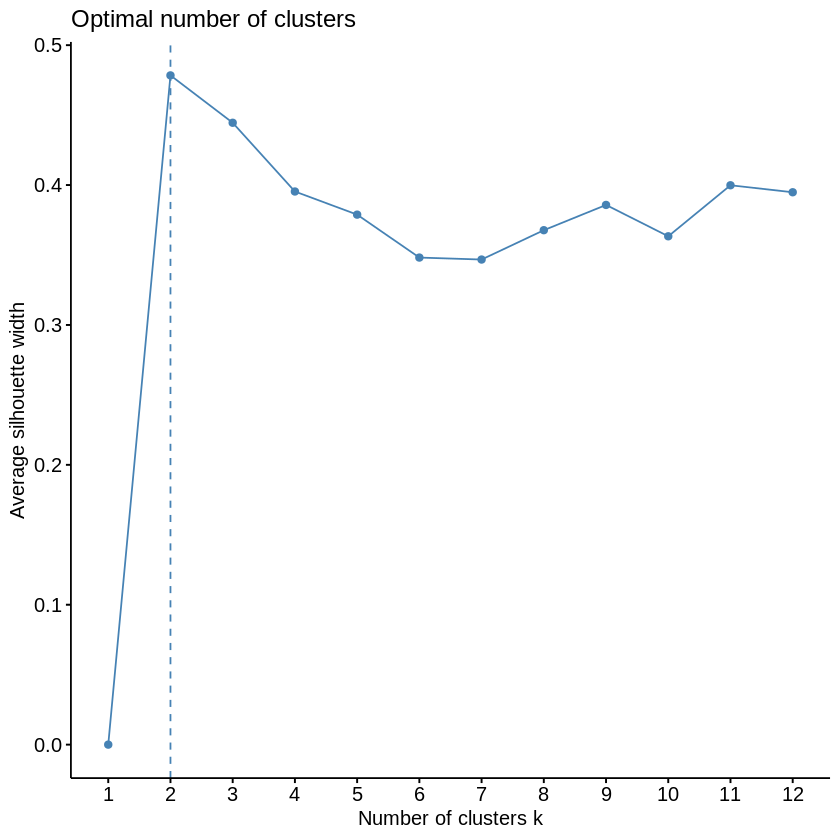

In [ ]:
fviz_nbclust(optimal_clusters, 
      FUNcluster = kmeans,  # K-Means
      method = "silhouette", # Avg. Silhouette
      k.max = 12       # max number of clusters
      )

## 將Rings_Group分為2組

In [ ]:
dfabalone_new <- dfabalone

In [ ]:
summary(dfabalone_new $Rings)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       8      10      10      11      29 

In [ ]:
breaks <- c(0,10,30) 
Rings_group <- cut(dfabalone_new $Rings, breaks, labels = NULL,
          include.lowest = FALSE, right = TRUE, dig.lab = 3,
          ordered_result = FALSE)
unique(Rings_group)

[1] (10,30] (0,10] 
Levels: (0,10] (10,30]

In [ ]:
dfabalone_new$Rings_group <- Rings_group 
dfabalone_new

Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Rings_group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,"(10,30]"
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,"(0,10]"
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,"(0,10]"
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,"(0,10]"
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,"(0,10]"
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,"(0,10]"
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,"(10,30]"
F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,"(10,30]"
M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,"(0,10]"


In [ ]:
dfabalone_new$Rings <- NULL

In [ ]:
dfabalone_kmeans <- dfabalone_new
head(dfabalone_kmeans)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,"(10,30]"
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,"(0,10]"
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,"(0,10]"
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,"(0,10]"
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,"(0,10]"
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,"(0,10]"


## 數值變量之間的相關性

In [ ]:
numeric.var <- sapply(dfabalone_kmeans, is.numeric)
numeric.var

Sex        Length      Diameter        Height   WholeWeight 
        FALSE          TRUE          TRUE          TRUE          TRUE 
ShuckedWeight VisceraWeight   ShellWeight   Rings_group 
         TRUE          TRUE          TRUE         FALSE

##連續資料相關性分析

In [ ]:
corr.matrix <- cor(dfabalone_kmeans[ ,numeric.var])
corr.matrix

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
Length,1.0000000,0.9861773,0.8207777,0.9258309,0.9001001,0.9033526,0.8977932
Diameter,0.9861773,1.0000000,0.8272203,0.9259161,0.8950113,0.8996811,0.9055960
Height,0.8207777,0.8272203,1.0000000,0.8145126,0.7708726,0.7940355,0.8135317
WholeWeight,0.9258309,0.9259161,0.8145126,1.0000000,0.9710014,0.9671256,0.9561085
ShuckedWeight,0.9001001,0.8950113,0.7708726,0.9710014,1.0000000,0.9324596,0.8829296
VisceraWeight,0.9033526,0.8996811,0.7940355,0.9671256,0.9324596,1.0000000,0.9070897
ShellWeight,0.8977932,0.9055960,0.8135317,0.9561085,0.8829296,0.9070897,1.0000000


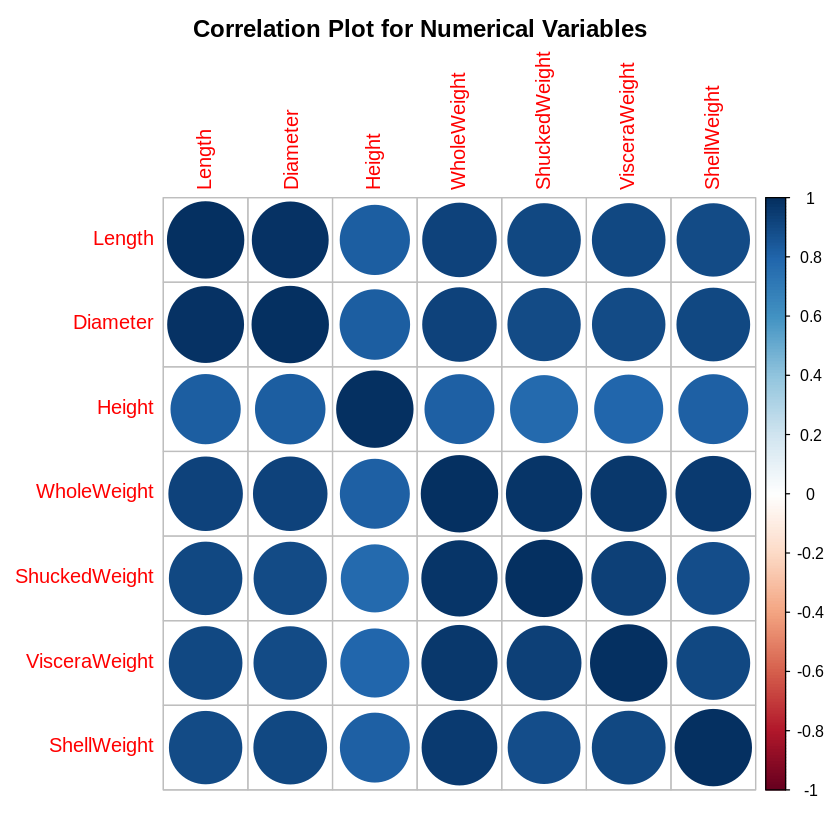

In [ ]:
corrplot(corr.matrix, main="\n\nCorrelation Plot for Numerical Variables")

## 將 dfabalone_kmeans 處理成可用kmeans的資料

In [ ]:
head(dfabalone_kmeans)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,"(10,30]"
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,"(0,10]"
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,"(0,10]"
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,"(0,10]"
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,"(0,10]"
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,"(0,10]"


In [ ]:
dfabalone_kmeans$Rings_group <- NULL

In [ ]:
dfabalone_kmeans$Sex <- as.factor(mapvalues(dfabalone_kmeans$Sex,from=c("M","F","I"),to=c(1,2,3)))

In [ ]:
dfabalone_kmeans$Sex <- sapply(dfabalone_kmeans$Sex,as.numeric)

In [ ]:
class(dfabalone_kmeans$Sex)

[1] "numeric"

In [ ]:
str(dfabalone_kmeans)

'data.frame':	4021 obs. of  8 variables:
 $ Sex          : num  1 1 2 1 3 3 2 2 1 2 ...
 $ Length       : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter     : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height       : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ WholeWeight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ ShuckedWeight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ VisceraWeight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ ShellWeight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...


## kmeans 建模

In [ ]:
(kmeans_result <- kmeans(dfabalone_kmeans, 2))

K-means clustering with 2 clusters of sizes 1313, 2708

Cluster means:
       Sex    Length  Diameter    Height WholeWeight ShuckedWeight
1 2.955826 0.4290937 0.3276276 0.1087624   0.4331043     0.1897936
2 1.450886 0.5748874 0.4506629 0.1558844   1.0387308     0.4474287
  VisceraWeight ShellWeight
1    0.09155598   0.1278324
2    0.22662574   0.2966972

Clustering vector:
   [1] 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 [112] 2 1 2 2 1 2 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 1 1 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1
 [223] 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [260] 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 

In [ ]:
table(dfabalone_new$Rings, kmeans_result$cluster)


         
             1    2
  (0,10]  1153 1446
  (10,30]  160 1262

In [ ]:
dim(dfabalone_new)

[1] 4021    9

## 錯誤率

In [ ]:
(160+1446)/4021

[1] 0.3994031

#Logistic Regression 羅吉斯迴歸

In [ ]:
intrain <- createDataPartition(dfabalone_new$Rings_group, p=0.7, list=FALSE)  # 百分之70訓練 30測試
set.seed(2017)
training <- dfabalone_new[intrain, ]  # training dataset 訓練集 # [intrain, ]後面沒寫表示全要
testing <- dfabalone_new[-intrain, ]  # testing dataset 測試集

In [ ]:
intrain

Resample1
1
2
3
5
6
7
9
10
11
12


In [ ]:
dim(training); dim(testing)

[1] 2816    9

[1] 1205    9

## Fitting the Logistic Regression Model 建模步驟:

In [ ]:
LogModel <- glm(Rings_group ~ .,family = binomial(link="logit"), data=training)

In [ ]:
summary(LogModel)


Call:
glm(formula = Rings_group ~ ., family = binomial(link = "logit"), 
    data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9529  -0.6926  -0.3787   0.7069   2.7021  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.81833    0.53962  -5.223 1.76e-07 ***
SexI           -0.53879    0.15255  -3.532 0.000413 ***
SexM            0.04781    0.10982   0.435 0.663275    
Length         -4.56518    2.51280  -1.817 0.069252 .  
Diameter        4.88477    3.08335   1.584 0.113139    
Height          3.22196    1.69012   1.906 0.056605 .  
WholeWeight     7.46184    1.40938   5.294 1.19e-07 ***
ShuckedWeight -15.50804    1.54142 -10.061  < 2e-16 ***
VisceraWeight  -5.00619    2.05959  -2.431 0.015071 *  
ShellWeight     9.96354    2.13048   4.677 2.92e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3659.1  on 2815

### 以下為為重要的因子影響到Rings_group

                  
* (Intercept)    -2.81833    0.53962  -5.223 1.76e-07 ***
* SexI           -0.53879    0.15255  -3.532 0.000413 ***
* WholeWeight     7.46184    1.40938   5.294 1.19e-07 ***
* ShuckedWeight -15.50804    1.54142 -10.061  < 2e-16 ***
* ShellWeight     9.96354    2.13048   4.677 2.92e-06 ***

## 特徵分析

In [ ]:
anova(LogModel, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,2815,3659.127,NA
Sex,2,341.59477,2813,3317.532,6.662500e-75
Length,1,244.09235,2812,3073.440,5.039882e-55
Diameter,1,48.67506,2811,3024.765,3.020836e-12
Height,1,45.89145,2810,2978.873,1.249905e-11
WholeWeight,1,1.20533,2809,2977.668,2.722590e-01
ShuckedWeight,1,356.04645,2808,2621.622,2.043959e-79
VisceraWeight,1,27.66502,2807,2593.956,1.442479e-07
ShellWeight,1,22.03271,2806,2571.924,2.680430e-06


## predict() 評估Logistic回歸模型的預測能力

In [ ]:
testing$Rings_group <- as.character(testing$Rings_group)
testing$Rings_group[testing$Rings_group == "(0,10]"] <- "0"
testing$Rings_group[testing$Rings_group == "(10,30]"] <- "1"
fitted.results <- predict(LogModel, newdata=testing, type='response')
fitted.results

4          8         23         24         26         27         30 
0.24758355 0.54632666 0.32094871 0.23865415 0.56707565 0.52905111 0.15929890 
        33         41         43         49         53         59         60 
0.60313543 0.12689634 0.25492001 0.17453074 0.19833846 0.11624306 0.69519580 
        64         68         70         71         79         85         87 
0.67150488 0.41802570 0.71078427 0.63175903 0.99398114 0.50704856 0.75511664 
        92         95         96         97         98         99        100 
0.28290902 0.52408188 0.83961393 0.28481615 0.63495968 0.41208474 0.65297945 
       104        105        106        107        109        112        116 
0.06813496 0.39706902 0.27323477 0.26116683 0.34562718 0.20487934 0.05203682 
       118        120        134        139        141        142        150 
0.99826217 0.19034876 0.21353576 0.93970975 0.72114321 0.29671466 0.99998633 
       153        155        158        160        167        170        173 
0.99941218 0.99626882 0.46503104 0.32142773 0.89886222 0.80471455 0.65457377 
       176        178        186        187        190        192        195 
0.37566305 0.97049686 0.27848077 0.13669260 0.06028351 0.09806671 0.54977600 
       198        199        200        203        205        206        207 
0.10409498 0.37798585 0.14529640 0.33503763 0.11345438 0.24155028 0.13123371 
       208        211        213        215        221        225        231 
0.06562248 0.56423248 0.97145288 0.12346167 0.05010417 0.05836575 0.81102788 
       236        237        240        241        243        247        251 
0.94044853 0.82077715 0.49246991 0.42884435 0.04013371 0.14137176 0.91856647 
       256        260        261        274        284        289        290 
0.96850980 0.72466707 0.08127397 0.90530194 0.23807810 0.36590931 0.84993591 
       293        294        307        308        315        338        342 
0.97096750 0.96684788 0.15342146 0.03504295 0.23636419 0.54953947 0.60118552 
       347        350        358        360        361        362        363 
0.86163325 0.41271600 0.28082090 0.22374121 0.20400855 0.43987259 0.07075648 
       364        371        378        381        382        383        389 
0.20463456 0.17208263 0.50491829 0.42308441 0.26976318 0.45316315 0.48527593 
       393        398        399        401        404        406        407 
0.05069127 0.88521386 0.90438853 0.61969505 0.14470556 0.09656384 0.09889290 
       408        409        415        419        426        427        428 
0.64145833 0.07945979 0.86297090 0.76218391 0.08533186 0.38781954 0.10490383 
       434        435        436        438        443        459        460 
0.86417454 0.85022037 0.99724623 0.41512732 0.69176479 0.63802809 0.76330554 
       462        463        464        466        471        475        480 
0.75838617 0.71964816 0.97278723 0.69923632 0.81014766 0.88001888 0.40394201 
       487        494        498        499        500        502        511 
0.08912265 0.05939789 0.29048185 0.17389337 0.16205713 0.12542040 0.16334086 
       523        530        532        533        534        538        542 
0.13237161 0.24792745 0.34750797 0.09399015 0.13361442 0.09571140 0.47044539 
       545        547        550        551        558        563        576 
0.42064687 0.96277226 0.66599997 0.07876298 0.34768004 0.64138853 0.16497835 
       580        586        589        592        599        601        604 
0.11918577 0.09000104 0.41993376 0.10232475 0.26158337 0.16532179 0.08496476 
       605        606        608        614        618        625        626 
0.16059081 0.34724696 0.70306487 0.69599049 0.06401505 0.80641236 0.65269879 
       627        629        632        633        636        637        638 
0.96269677 0.19740753 0.13213862 0.39461878 0.49340802 0.43515595 0.76405776 
       639        644        646        652        653        654        662 
0.31870203 0.80414510 0.0706963

In [ ]:
fitted.results <- ifelse(fitted.results > 0.5, 1, 0)
fitted.results

4    8   23   24   26   27   30   33   41   43   49   53   59   60   64   68 
   0    1    0    0    1    1    0    1    0    0    0    0    0    1    1    0 
  70   71   79   85   87   92   95   96   97   98   99  100  104  105  106  107 
   1    1    1    1    1    0    1    1    0    1    0    1    0    0    0    0 
 109  112  116  118  120  134  139  141  142  150  153  155  158  160  167  170 
   0    0    0    1    0    0    1    1    0    1    1    1    0    0    1    1 
 173  176  178  186  187  190  192  195  198  199  200  203  205  206  207  208 
   1    0    1    0    0    0    0    1    0    0    0    0    0    0    0    0 
 211  213  215  221  225  231  236  237  240  241  243  247  251  256  260  261 
   1    1    0    0    0    1    1    1    0    0    0    0    1    1    1    0 
 274  284  289  290  293  294  307  308  315  338  342  347  350  358  360  361 
   1    0    0    1    1    1    0    0    0    1    1    1    0    0    0    0 
 362  363  364  371  378  381  382  383  389  393  398  399  401  404  406  407 
   0    0    0    0    1    0    0    0    0    0    1    1    1    0    0    0 
 408  409  415  419  426  427  428  434  435  436  438  443  459  460  462  463 
   1    0    1    1    0    0    0    1    1    1    0    1    1    1    1    1 
 464  466  471  475  480  487  494  498  499  500  502  511  523  530  532  533 
   1    1    1    1    0    0    0    0    0    0    0    0    0    0    0    0 
 534  538  542  545  547  550  551  558  563  576  580  586  589  592  599  601 
   0    0    0    0    1    1    0    0    1    0    0    0    0    0    0    0 
 604  605  606  608  614  618  625  626  627  629  632  633  636  637  638  639 
   0    0    0    1    1    0    1    1    1    0    0    0    0    0    1    0 
 644  646  652  653  654  662  663  666  671  672  677  678  683  686  690  691 
   1    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0 
 692  693  695  696  699  702  706  707  708  709  711  713  716  718  722  723 
   0    0    0    1    0    0    1    0    0    1    1    0    0    1    1    1 
 724  731  733  742  745  751  752  754  760  762  768  772  774  775  776  781 
   0    1    0    0    0    0    1    1    1    0    0    1    1    1    1    0 
 782  786  788  789  793  798  804  807  808  809  810  813  817  819  820  830 
   0    0    0    0    0    0    0    0    0    0    0    1    1    0    1    1 
 834  837  840  841  851  852  853  857  861  863  868  870  876  877  880  882 
   1    1    1    0    1    0    1    0    0    0    0    0    0    0    0    0 
 884  889  893  894  895  903  904  905  908  909  912  917  919  920  928  935 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 939  943  945  950  952  953  958  959  968  970  973  974  982  984  986  989 
   0    0    1    0    1    0    0    0    0    1    1    0    1    0    1    0 
 991  993  998  999 1001 1002 1004 1010 1011 1017 1019 1022 1024 1028 1029 1034 
   1    1    1    0    1    1    0    1    1    0    0    0    0    0    0    0 
1040 1044 1045 1047 1049 1050 1051 1053 1054 1057 1058 1062 1063 1066 1073 1078 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1083 1084 1085 1086 1091 1092 1097 1099 1110 1112 1119 1120 1124 1125 1126 1129 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1132 1136 1144 1146 1152 1160 1163 1165 1169 1176 1179 1180 1182 1191 1193 1194 
   1    1    1    0    1    1    1    0    0    0    0    0    0    0    0    0 
1197 1198 1202 1203 1204 1207 1212 1217 1218 1222 1228 1230 1233 1237 1238 1239 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1243 1244 1245 1249 1265 1266 1267 1268 1275 1276 1277 1278 1279 1282 1283 1284 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
1285 1292 1293 1295 1296 1300 1301 1307 1308 1311 1313 1317 1321 1325 1327 1330 
   0    0    0    0    0    1    0

In [ ]:
as.data.frame(fitted.results)

,fitted.results
,<dbl>
4,0
8,1
23,0
24,0
26,1
27,1
30,0
33,1
41,0


### 準確率

In [ ]:
misClasificError <- mean(fitted.results != testing$Rings_group)
print(paste('Logistic Regression Accuracy', 1-misClasificError))

[1] "Logistic Regression Accuracy 0.780082987551867"


# Logistic Regression Confusion Matrix 回歸混淆矩陣

In [ ]:
print("Confusion Matrix for Logistic Regression"); table(testing$Rings_group, fitted.results > 0.5)

[1] "Confusion Matrix for Logistic Regression"


   
    FALSE TRUE
  0   702   77
  1   188  238

In [ ]:
1-(188+77)/(702+77+188+238)

[1] 0.780083

# 優勢比

In [ ]:
exp(cbind(OR=coef(LogModel), confint(LogModel)))

Waiting for profiling to be done...



,OR,2.5 %,97.5 %
(Intercept),5.970548e-02,2.026309e-02,1.681940e-01
SexI,5.834530e-01,4.319780e-01,7.858486e-01
SexM,1.048976e+00,8.460107e-01,1.301353e+00
Length,1.040803e-02,7.565026e-05,1.499772e+00
Diameter,1.322595e+02,3.026297e-01,5.552328e+04
Height,2.507712e+01,7.930382e-01,1.370502e+03
WholeWeight,1.740340e+03,1.152077e+02,2.900372e+04
ShuckedWeight,1.840543e-07,8.445283e-09,3.567101e-06
VisceraWeight,6.696376e-03,1.139811e-04,3.677013e-01
ShellWeight,2.123786e+04,3.294971e+02,1.402435e+06


# Decision Tree 決策樹

In [ ]:
head(training)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,"(10,30]"
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,"(0,10]"
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,"(0,10]"
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,"(0,10]"
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,"(0,10]"
7,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,"(10,30]"


In [ ]:
training$Sex <- sapply(training$Sex,as.factor)

In [ ]:
class(training$Sex)

[1] "factor"

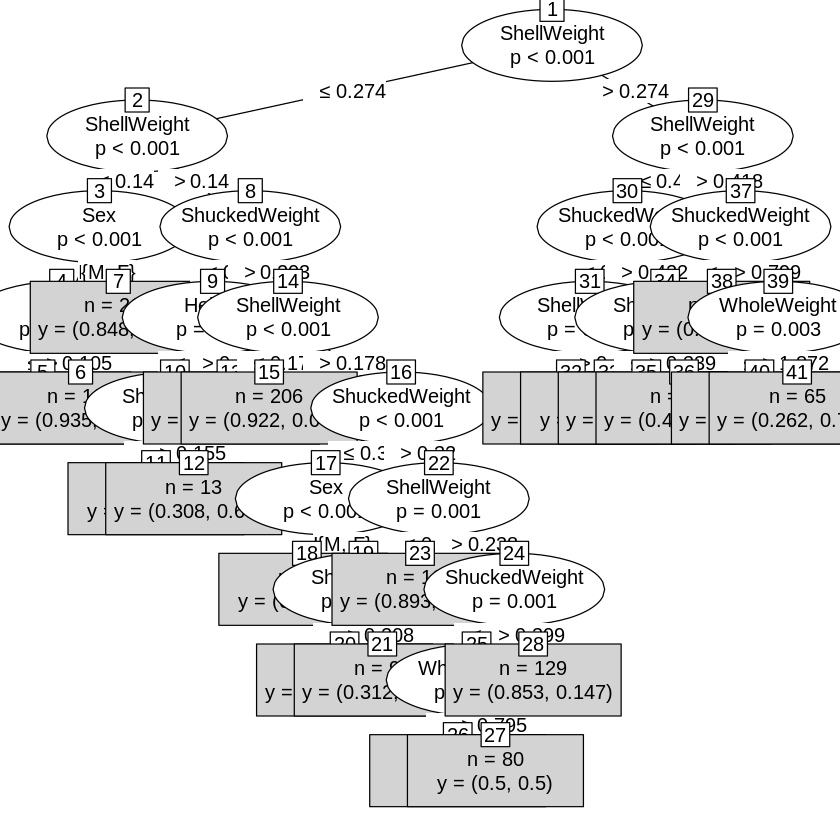

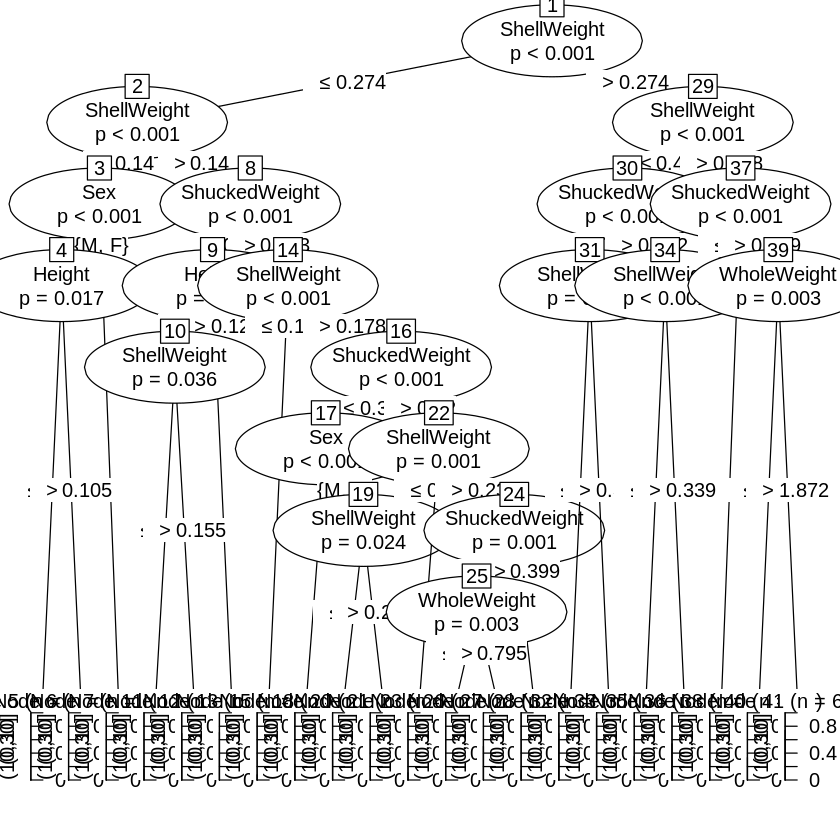

In [ ]:
treeAll <- ctree(Rings_group ~ ., training)
plot(treeAll, type='simple')
plot(treeAll)